Finished (110, 98)	ep_112_2.json
Finished (124, 98)	ep_112_3.json
Finished (107, 98)	ep_112_4.json
Finished (126, 98)	ep_112_5.json
Finished (93, 98)	ep_112_6.json
Finished (118, 98)	ep_112_7.json
Finished (127, 98)	ep_112_8.json
Finished (123, 98)	ep_112_9.json
Finished (138, 98)	ep_112_10.json
Finished (203, 98)	ep_112_11.json
Finished (93, 98)	ep_112_12.json
Finished (111, 98)	ep_112_13.json
Finished (109, 98)	ep_112_14.json
Finished (127, 98)	ep_112_15.json
Finished (112, 98)	ep_112_16.json
Finished (136, 98)	ep_112_17.json
Finished (1250, 98)	ep_136_2.json
Finished (1226, 98)	ep_136_3.json
Finished (443, 98)	ep_136_4.json
Finished (966, 98)	ep_136_5.json
Finished (1287, 98)	ep_136_6.json
Finished (1228, 98)	ep_136_7.json
Finished (1209, 98)	ep_136_8.json
Finished (538, 98)	ep_136_9.json
Finished (457, 98)	ep_136_10.json
Finished (496, 98)	ep_136_11.json
Finished (1225, 98)	ep_136_12.json
Finished (1789, 98)	ep_172_2.json
Finished (1799, 98)	ep_172_3.json
Finished (1669, 98)	ep_172

<AxesSubplot:xlabel='ep_num', ylabel='RL_Agent.Steer'>

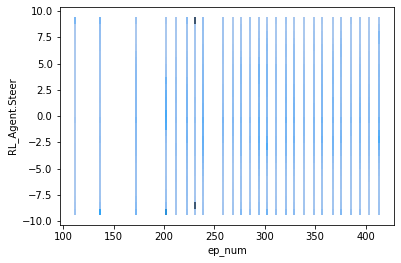

In [2]:
import pandas as pd 
import seaborn as sns
import re
import os


DIRECTORY = "/home/andreas-z97x-ud3h/CM_Projects/CM_RL_Driver/RL/rl_data/first_trial_1/rl_uaq_store"
file_list = os.listdir(DIRECTORY)

hists = {}
df = pd.DataFrame()

for file in file_list:

    matched = re.match("ep_(?P<ep_num>[0-9]+)_[0-9]+.json", file)
    JSON_FILE = os.path.join(DIRECTORY, file)
    size = os.stat(JSON_FILE).st_size
    is_match = bool(matched) and (size > 1e5)

    if is_match:
        ep_num = int(matched.group('ep_num'))
        tmp_df = pd.read_json(JSON_FILE)
        tmp_df['ep_num'] = ep_num
        df = df.append(tmp_df)
        print("Finished " + str(tmp_df.shape) +"\t"+ file)


sns.histplot(data=df, x="ep_num", y="RL_Agent.Steer", bins=30, discrete=(True, False))



<AxesSubplot:xlabel='ep_num', ylabel='RL_Agent.Steer'>

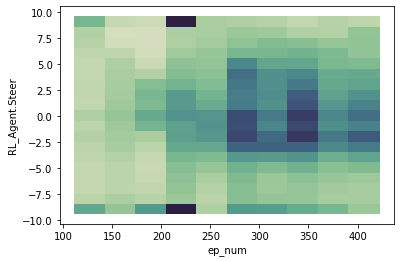

In [65]:
palette = sns.color_palette("plasma", as_cmap=True)
sns.histplot(
    df, x="ep_num", y="RL_Agent.Steer",
    discrete=(False, False),
    binwidth=[31,1],
    cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
)